In [90]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

In [91]:
# define the path for the traning and test data
data_path = 'data/cell_images/cell_images'
os.listdir(data_path)

['test', 'train']

In [92]:
training_path = data_path+'\\train\\'
test_path = data_path+'\\test\\'
os.listdir(test_path)

['parasitized', 'uninfected']

In [97]:
#Choose name of a random infected cell from the training data
random_infected_cell = random.choice(os.listdir(training_path+'parasitized'))
random_infected_cell

'C119P80ThinF_IMG_20151002_124345_cell_151.png'

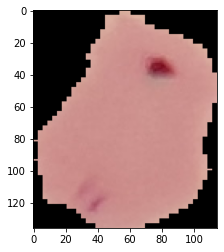

In [98]:
#Display the image using Matplotlib
infected_cell = training_path+'\\parasitized\\'+random_infected_cell
plt.imshow(imread(infected_cell))

In [105]:
#Choose name of a random uninfected cell from the training data
random_uninfected_cell = random.choice(os.listdir(training_path+'uninfected'))

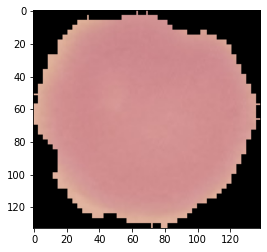

In [106]:
#Display the image using Matplotlib
healthy_cell =  training_path+'uninfected\\'+random_uninfected_cell
plt.imshow(imread(healthy_cell))

In [107]:
# Infected training size
len(os.listdir(training_path+'\\parasitized'))

12480

In [108]:
# Uninfected training size
len(os.listdir(training_path+'\\uninfected'))

12480

In [109]:
imread(infected_cell).shape

(136, 115, 3)

#### Check the dimensions of all images in a directory

In [110]:
dim1=[]
dim2=[]
for image in os.listdir(test_path+'uninfected'):
    image = imread(test_path+'\\uninfected\\'+image)
    d1, d2, colors = image.shape
    dim1.append(d1)
    dim2.append(d2)


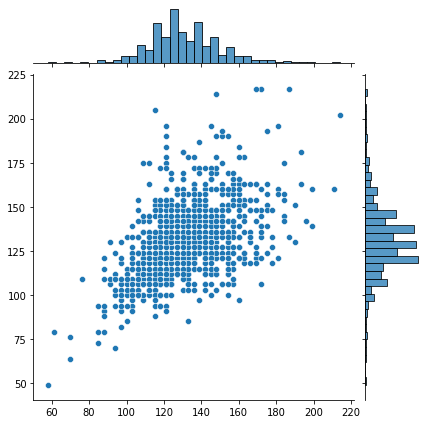

In [111]:
sns.jointplot(x=dim1,y=dim2)
plt.show()

In [112]:
np.mean(dim1)

130.92538461538462

In [113]:
np.mean(dim2)

130.75

In [114]:
image_shape = (130, 130, 3)

### Image preprocessing
Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data

In [115]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [116]:
image_generator = ImageDataGenerator(rotation_range=20, #Rotate image by 20 degrees
                                     width_shift_range=0.1, #Shift the image width by max of 10%
                                     height_shift_range=0.1, #Shift the image height by max of 10%
                                     rescale=1/255, # Rescale the image by normalizing it
                                     shear_range=0.1, # Shear mean cutting away portion of the image (max 10%)
                                     zoom_range=0.1, # Zoom by max 10%
                                     horizontal_flip=True, # Allow image flipping
                                     fill_mode='nearest' # Fill in the missing pixels with the nearest filled value.
                                    )

In [117]:
image_generator.flow_from_directory(training_path)

Found 24958 images belonging to 2 classes.


In [118]:
image_generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Dropout, Flatten

In [120]:
model=Sequential()
# 1st convolutional layer
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))
# 2nd convolutional layer
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))
# 3rd convolutuional layer
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=1))

In [121]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 129, 129, 32)      416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 127, 127, 64)      8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      16448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 124, 124, 64)      0         
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
__________________________________________________

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

In [122]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

### Droputs are used to add some noise to the model to avoid overfitting.

In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 129, 129, 32)      416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 127, 127, 64)      8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      16448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 124, 124, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 984064)           

The network summary shows that (124, 124, 64) outputs were flattened into vectors of shape (984064) before going through two Dense layers.

In [124]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'] )

### Other Oplimizers are
<p>Adamax</p>
<p>Adagrad, etc</p>

### Loss
Binary cross entropy is used when the are just two classed in the classification problem.
This is how it works:
<ul>
    <li>Get the probality for the prediction for each data point or image </li>
    <li>Probability is between 0 & 1.</li>
    <li>We want want to penalize wrong predictions.</li>
    <li>If the probability associated with the true class is 1 then the loss is 0</li>
    <li>Conversely, if that probability is low, say, 0.01, we need its loss to be HUGE!</li>
    <li>Then find the logs for each. </li>
    <li>The logs for numbers between 0 and 1 are -ve values and become smaller as numbers move towards 0.</li>
    <li>Since the logs are -ve we get the absolute values then find the mean.</li>
    <li>The mean is the loss.</li>
</ul>

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 129, 129, 32)      416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 127, 127, 64)      8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      16448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 124, 124, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 984064)           

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

<p><b>Callbacks</b> are objects in tensorflow & keras that are designed to monitor the model performance in metrics between epochs.</p>
<p><b>Early stopping</b> Stop training when a monitored metric has stopped improving. Assuming the goal of a training is to minimize the loss.</p>

<p><b>monitor='val_loss'</b> to use validation loss as performance measure to terminate the training.</p>
    
<p><b>patience=0:</b> is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.</p>

In [33]:
batch_size = 16

<p>
    The <b>batch size</b> defines the number of samples that will be propagated through the network.
    For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network.<br>
    <b>Iterations = data_size/batch_size</b>
</p>

<h1>Advantages of Using Batches</h1>

<ul>
    <li>It requires less memory. The higher the batch size, the more memory space you'll need.</li>
    <li>Typically networks train faster with mini-batches.</li>
</ul>
However dont use very small batch size because the smaller the batch the less accurate the estimate of the gradient will be.

In [126]:
#Keras ImageDataGenerator class which allows the users to perform image augmentation on the fly in a very easy way.
train_image_gen = image_generator.flow_from_directory(training_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')



Found 24958 images belonging to 2 classes.


In [127]:
test_image_gen = image_generator.flow_from_directory(test_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary')

Found 2600 images belonging to 2 classes.


In [128]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [37]:
%%time
results = model.fit(train_image_gen,epochs=3,
                              validation_data=test_image_gen,
                              callbacks=[early_stop]
                             )

Epoch 1/3
1560/1560 [==============================] - 743s 475ms/step - loss: 0.3908 - accuracy: 0.8491 - val_loss: 0.1865 - val_accuracy: 0.9281
Epoch 2/3
1560/1560 [==============================] - 600s 385ms/step - loss: 0.1865 - accuracy: 0.9439 - val_loss: 0.1698 - val_accuracy: 0.9454
Epoch 3/3
1560/1560 [==============================] - 567s 364ms/step - loss: 0.1764 - accuracy: 0.9467 - val_loss: 0.1684 - val_accuracy: 0.9435
Wall time: 31min 51s


### Val_loss
<p>
    When the <b>val_loss</b> is increasing and <b>val_accuracy</b> is increasing, there might be an overfitting problem in the model
</p>
<p>
    When the <b>val_loss</b> is increasing and <b>val_accuracy</b> is decreasing, the model is rather cramming not learning.
</p>
<p>
    Finally if the <b>val_loss</b> is decreasing and the <b>val_accuracy</b> is increasing, the model is learning well.
</p>

In [38]:
from tensorflow.keras.models import load_model
model.save('malaria_model.h5')

In [39]:
from tensorflow.keras.models import load_model
trained_model = load_model('malaria_model.h5')

In [129]:
losses = pd.DataFrame(model.history.history)

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
losses[['loss','val_loss']].plot()

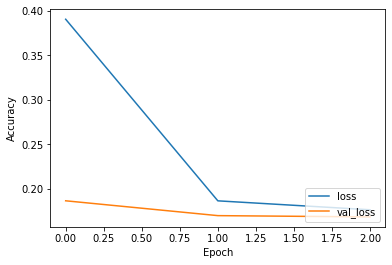

In [42]:
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [130]:
test_loss, test_acc = model.evaluate(test_image_gen)
print(test_loss)
print(test_acc)

163/163 [==============================] - 68s 403ms/step - loss: 0.6956 - accuracy: 0.5000
0.6955985426902771
0.5


In [131]:
pred_probabilities = model.predict(test_image_gen)

In [132]:
pred_probabilities

array([[0.46817055],
       [0.47305858],
       [0.4787773 ],
       ...,
       [0.48116505],
       [0.4761864 ],
       [0.47351417]], dtype=float32)

In [46]:
#Get probabilities greater than 0.5
predictions = pred_probabilities > 0.5

In [47]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [48]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [133]:
from sklearn.metrics import classification_report,confusion_matrix

In [134]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1300
           1       0.50      0.51      0.50      1300

    accuracy                           0.50      2600
   macro avg       0.50      0.50      0.50      2600
weighted avg       0.50      0.50      0.50      2600



In [136]:
confusion_matrix(test_image_gen.classes,predictions)

array([[642, 658],
       [640, 660]], dtype=int64)

#### Image Prediction

In [137]:
infected_cell

'data/cell_images/cell_images\\train\\\\parasitized\\C119P80ThinF_IMG_20151002_124345_cell_151.png'

In [138]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
my_image = load_img(infected_cell,target_size=image_shape)

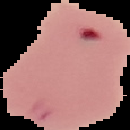

In [139]:
my_image

In [141]:
# convert image to numpy array
my_image = img_to_array(my_image)

In [142]:
my_image.shape

(130, 130, 3)

In [143]:
my_image = np.expand_dims(my_image, axis=0)

In [144]:
my_image.shape

(1, 130, 130, 3)

In [146]:
# predict 
pred=model.predict(my_image)
pred

array([[2.0557146e-14]], dtype=float32)

In [147]:
# class index
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## END